In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import chirp, spectrogram
import sounddevice as sd

In [7]:
t = np.linspace(0,10,10000) #times to evaluate chirp
t1 = 10 #final time
f0 = 1 #start f
f1 = 10 #stop f
signal = chirp(t, f0, t1, f1, method = 'linear') 

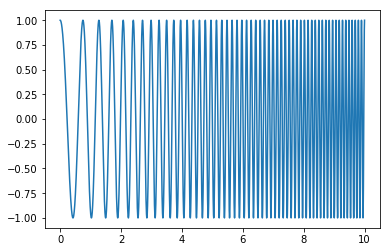

In [8]:
plt.plot(t, signal)
plt.show()

In [9]:
def plot_spectrogram(title, w, fs):
    ff, tt, Sxx = spectrogram(w, fs=fs, nperseg=256, nfft=576)
    plt.pcolormesh(tt, ff[:145], Sxx[:145], cmap='gray_r', shading='gouraud')
    plt.title(title)
    plt.xlabel('t (sec)')
    plt.ylabel('Frequency (Hz)')
    plt.grid()

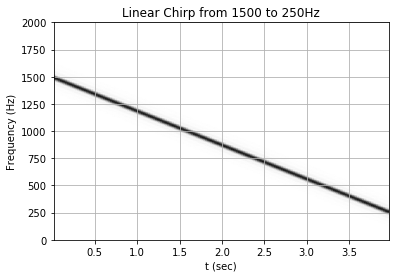

In [10]:
T = 4
fs = 8000
t = np.arange(0, int(T*fs)) / fs
w = chirp(t, f0=1500, f1=250, t1=T, method='linear')
plot_spectrogram('Linear Chirp from 1500 to 250Hz', w, fs)

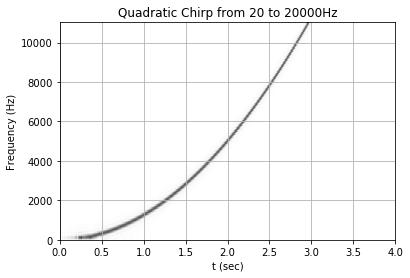

In [11]:
T = 4
fs = 44100
t = np.arange(0, int(T*fs)) / fs
w = chirp(t, f0=20, f1=20000, t1=T, method='quadratic')
plot_spectrogram('Quadratic Chirp from 20 to 20000Hz', w, fs)

In [12]:
from scipy.io.wavfile import write
write('quadratic_20_20k.wav', 44100, w)

In [13]:
w_inv = np.flip(w)

In [14]:
write('quadratic_20_20k_inv.wav', 44100, w_inv)

In [17]:
samplerate = 44100
duration = 5

recording = sd.rec(
    duration * samplerate, samplerate=samplerate, channels=1, blocking=True
).flatten()

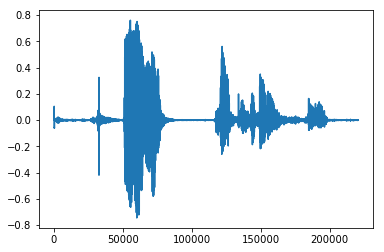

In [18]:
plt.plot(recording)

In [20]:
sd.play(recording, samplerate=samplerate, blocking=True)